In [1]:
import pandas as pd

raw_total = pd.read_excel('./file/1_crawling_raw.xlsx')
raw_total['tags'][:3]

0    ['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛...
1    ['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo...
2    ['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주...
Name: tags, dtype: object

In [4]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

from collections import Counter

tag_counts = Counter(tags_total)

tag_counts.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도', 2053),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#jeju', 749),
 ('#일상', 701),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#선팔', 503),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주눈썹문신', 434),
 ('#서귀포눈썹문신', 420),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405),
 ('#반영구', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주속눈썹', 397)]

In [5]:
# 제주도맛집과 무관한 해시태그를 빼고 살펴보기
STOPWORDS = ['#일상',
             '#선팔',
             '#제주도',
             '#jeju',
             '#반영구',
             '#제주자연눈썹',
             '#서귀포눈썹문신',
             '#제주눈썹문신',
             '#소통',
             '#맞팔']

tag_total_selected = []

for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주속눈썹', 397),
 ('#먹스타그램', 395),
 ('#서귀포반영구', 395),
 ('#서귀포속눈썹', 395),
 ('#제주남자눈썹문신', 395),
 ('#서귀포자연눈썹', 395),
 ('#서귀포남자눈썹문신', 395),
 ('#카멜리아힐', 379)]

<AxesSubplot:xlabel='counts', ylabel='tags'>

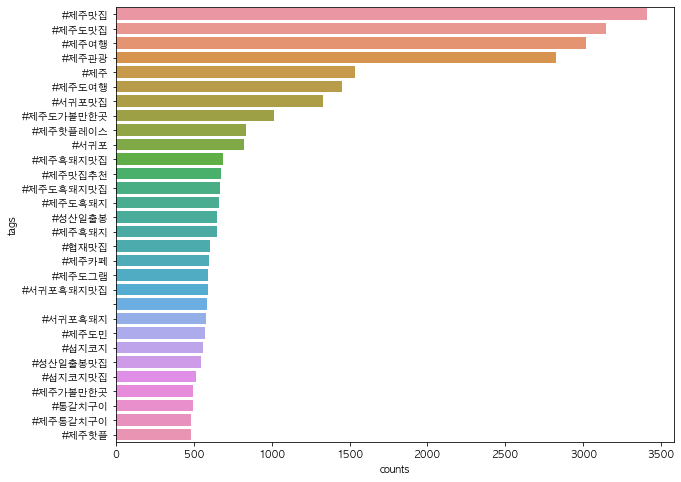

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

font_name = ""

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"
    
rc('font',family=font_name)

tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

plt.figure(figsize = (10, 8))
sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)

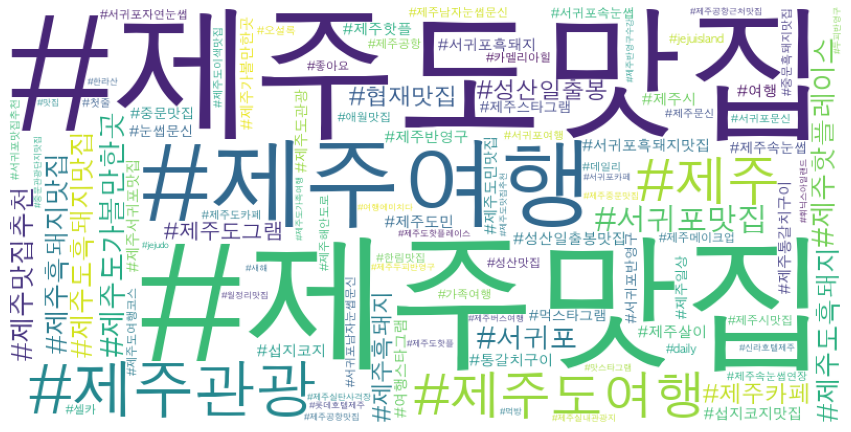

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud    # 에러 발생 시 pip install wordcloud 실행
import platform

if platform.system() == 'Windows':
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"
    
    
wordcloud = WordCloud(font_path = font_path,
                      background_color = 'white',
                      max_words = 100,
                      relative_scaling = 0.3,
                      width = 800,
                      height = 400
                     ).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./file/tag-wordcloud.png')

In [26]:
import pandas as pd

raw_total = pd.read_excel('./file/1_crawling_raw.xlsx')
raw_total.head()

,content,data,like,place,tags
0,제주도 도착~~공항근처 #제주분식 에서 먹은 첫식사만족만족!#제주맛집#제주도맛집#제...,2019-01-01,705,NaN,"['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛..."
1,﻿#함덕맛집 무거버거 바다 보면서 먹으니까 더 꿀맛👍🏻 #제주도카페투어#제주일상#함...,2019-01-01,384,NaN,"['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo..."
2,.대만족 제주스!.#동문시장#제주동문시장#제주도기념품#제주기념품#제주스는완벽#제주도...,2019-01-01,595,NaN,"['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주..."
3,#제주여행#2일차무거버거 제주와서 먹은것중에 제일 맛있었음!#제주도여행#제주맛집#함...,2019-01-01,412,NaN,"['#제주여행', '#2일차무거버거', '#제주도여행', '#제주맛집', '#함덕맛..."
4,"🥇1월 영업 안내🥇-1월 2일, 3일(수,목)은 쉬어갑니다-1월 4일,5일,6일(금...",2019-01-01,364,로타리과자점,[]


In [27]:
location_counts = raw_total['place'].value_counts()
location_counts

Jeju                              241
Jeju-do                           172
Jungle Book by Alice              101
Seogwipo                           65
제주도 크리스마스 박물관                      59
                                 ... 
민경이네 어등포해녀촌                         1
나도섬이다                               1
김포 구래동                              1
Jeju Island, South Korea - 제주도      1
라비에 와인비스트로                          1
Name: place, Length: 1027, dtype: int64

In [28]:
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
Jeju,241
Jeju-do,172
Jungle Book by Alice,101
Seogwipo,65
제주도 크리스마스 박물관,59


In [43]:
location_counts_df.to_excel('./file/location_counts.xlsx')

locations = list(location_counts.index)
locations

['Jeju',
 'Jeju-do',
 'Jungle Book by Alice',
 'Seogwipo',
 '제주도 크리스마스 박물관',
 '제주에인감귤밭',
 'Jeju Island',
 '성산일출봉 城山日出峰  Seongsan Ilchulbong',
 '폼포코식당_pompokokitchen',
 '1100고지',
 'Nimome',
 '월정리해변',
 '석부작박물관',
 '제주도 애월읍',
 '알뜨르 비행장',
 '카멜리아 힐',
 '제주레포츠랜드',
 '밥깡패',
 '고집돌우럭중문점',
 '제주 함덕 서우봉 해변',
 '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地',
 '할로비치',
 '제주신화월드 Jeju Shinhwa World',
 '위미동백나무군락지',
 '제주고궁한복카페 jeju gogung hanbok studio',
 'Woljeongri Beach',
 '협재해변 Beach',
 '연동 바오젠 거리',
 '고래배꼽',
 '새별오름',
 '용눈이오름',
 '용머리해안',
 '김녕미로공원 Jeju Kimnyoung Maze Park',
 '하이엔드 제주',
 '사려니숲길',
 '캔디원',
 '제주빅볼랜드',
 '제주커피박물관 Baum',
 'Jeju Island 제주특별자치도 济州道',
 '위미2리 동백군락지',
 '위미동백나무군락',
 'Jeju Aewol',
 '휴애리 자연생활공원',
 '마마뜰',
 '한라산',
 '서귀포 느영나영 게스트하우스',
 '삼무공원',
 '광치기해변',
 '서우봉',
 '제주해남',
 '한라산 (漢拏山, Hallasan)',
 '월정리카페콧수염',
 '제주 송악산',
 '성이시돌목장',
 '옹포별장가든',
 '제주어린왕자게스트하우스',
 '제주 꿈꾸는고래 스쿠버&게스트하우스',
 '카페브리프',
 '곽지해수욕장',
 '에코랜드',
 '牛岛 Udo Island 우도',
 '산굼부리',
 '아줄레주',
 '카페한라산',
 '고집돌우럭-gozipfish',
 '퍼시픽랜드 - Pacific Land JEJU',
 

In [44]:
import requests

searching = '합정 스타벅스'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)

headers = {
    "Authorization": "KakaoAK <API 키 적기>"
}

places = requests.get(url, headers = headers).json()['documents']
places

[{'address_name': '서울 마포구 서교동 395-166',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '26572121',
  'phone': '',
  'place_name': '스타벅스 서교점',
  'place_url': 'http://place.map.kakao.com/26572121',
  'road_address_name': '서울 마포구 양화로 78',
  'x': '126.916980454434',
  'y': '37.5514601750423'},
 {'address_name': '서울 마포구 합정동 472',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2057327896',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정점',
  'place_url': 'http://place.map.kakao.com/2057327896',
  'road_address_name': '서울 마포구 월드컵로1길 14',
  'x': '126.91211392586314',
  'y': '37.54981773755399'},
 {'address_name': '서울 마포구 서교동 490',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '288597324',
  'phone': '',
  'place_name': '스타벅스 합정폴리스R

In [45]:
# 카카오 로컬 API 장소 검색 함수 만들기
def find_places(searching):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    
    headers = {
        "Authorization": "KakaoAK <API 키 적기>"
    }
    
    places = requests.get(url, headers = headers).json()['documents']
    
    place = places[0]
    name = place['place_name']
    x = place['x']
    y = place['y']
    
    data = [name, x, y, searching]
    
    return data



In [46]:
data = find_places('제주공항')
data

['제주국제공항', '126.492769004244', '33.5070789578184', '제주공항']

In [50]:
import time
from tqdm.notebook import tqdm
# ! pip install tqdm   # tqdm 라이브러리 설치하기

locations_inform = []

for location in tqdm(locations):
    try:
        data = find_places(location)
        locations_inform.append(data)
        time.sleep(0.5)
    except:
        pass
    
locations_inform    

[['Jeju in aA', '126.83650369902168', '33.53833652360498', 'Jeju'],
 ['서귀포잠수함', '126.558616052674', '33.2393033784206', 'Seogwipo'],
 ['바이나흐튼 크리스마스박물관',
  '126.32786432205793',
  '33.291569413292265',
  '제주도 크리스마스 박물관'],
 ['제주에인감귤밭', '126.539409663514', '33.2566099433115', '제주에인감귤밭'],
 ['제주도', '126.545875710283', '33.3797769227161', 'Jeju Island'],
 ['한라산1100고지', '126.462219691112', '33.3580781709788', '1100고지'],
 ['월정리해수욕장', '126.795805057888', '33.556469394054', '월정리해변'],
 ['석부작박물관', '126.536501983154', '33.2504031491774', '석부작박물관'],
 ['올레길 17코스(광령-제주원도심 올레)', '126.439341083568', '33.4608856490895', '제주도 애월읍'],
 ['알뜨르비행장', '126.271527320164', '33.2047161778831', '알뜨르 비행장'],
 ['카멜리아힐', '126.370009467525', '33.2896344311608', '카멜리아 힐'],
 ['제주레포츠랜드', '126.6387551242765', '33.48206819907232', '제주레포츠랜드'],
 ['밥깡패', '126.263436208895', '33.410093302084', '밥깡패'],
 ['고집돌우럭 중문점', '126.416704762779', '33.2579811121134', '고집돌우럭중문점'],
 ['함덕해수욕장', '126.669238934013', '33.5430615661113', '제주 함덕 서우봉

In [93]:
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['네이버위치명', '경도', '위도', '인스타위치명']
locations_inform_df.to_excel('./file/locations.xlsx', index=False)

locations_counts_df = pd.read_excel('./file/location_counts.xlsx', index_col=0)

locations_counts_df

,place
Jeju,241
Jeju-do,172
Jungle Book by Alice,101
Seogwipo,65
제주도 크리스마스 박물관,59
...,...
민경이네 어등포해녀촌,1
나도섬이다,1
김포 구래동,1
"Jeju Island, South Korea - 제주도",1


In [94]:
locations_inform_df = pd.read_excel('./file/locations.xlsx')

locations_inform_df

,네이버위치명,경도,위도,인스타위치명
0,Jeju in aA,126.836504,33.538337,Jeju
1,서귀포잠수함,126.558616,33.239303,Seogwipo
2,바이나흐튼 크리스마스박물관,126.327864,33.291569,제주도 크리스마스 박물관
3,제주에인감귤밭,126.539410,33.256610,제주에인감귤밭
4,제주도,126.545876,33.379777,Jeju Island
...,...,...,...,...
814,플레이스엉물,126.900660,33.489656,플레이스엉물
815,마로니에공원,127.002826,37.580289,마로니에 공원
816,민경이네어등포해녀촌,126.825773,33.553735,민경이네 어등포해녀촌
817,나도섬이다,126.665544,33.541944,나도섬이다


In [95]:
location_data = pd.merge(locations_inform_df, locations_counts_df,
                         how = 'inner', left_on = '네이버위치명', right_index=True)

location_data.head()

,네이버위치명,경도,위도,인스타위치명,place
1,서귀포잠수함,126.558616,33.239303,Seogwipo,1
542,서귀포잠수함,126.558616,33.239303,서귀포잠수함,1
3,제주에인감귤밭,126.539410,33.256610,제주에인감귤밭,48
4,제주도,126.545876,33.379777,Jeju Island,4
75,제주도,126.545876,33.379777,제주도,4


In [96]:
location_data['네이버위치명'].value_counts()

자매국수 본점     3
오설록티뮤지엄     3
제주도         2
비자림         2
신창풍차해안도로    2
           ..
덕승식당        1
바램목장&카페     1
안녕협재씨       1
꽃돼지연탄구이     1
착한스시        1
Name: 네이버위치명, Length: 402, dtype: int64

In [97]:
location_data = location_data.pivot_table(
        index = ['네이버위치명', '경도', '위도'],
        values = 'place',
        aggfunc='sum')
location_data.head()

,,,place
네이버위치명,경도,위도,
702키친,126.534134,33.498835,1
73st,126.455109,33.456989,1
가드망제,126.532954,33.500991,1
가배,126.505570,33.231541,1
가시식당,126.771438,33.353060,2


In [98]:
location_data = pd.merge(locations_inform_df, locations_counts_df,
                         how = 'inner', left_on = '네이버위치명', right_index=True)

location_data.to_excel('./file/location_inform.xlsx', index=False)

In [106]:
# 시각화

location_data = pd.read_excel('file/location_inform.xlsx')
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   네이버위치명  433 non-null    object 
 1   경도      433 non-null    float64
 2   위도      433 non-null    float64
 3   인스타위치명  433 non-null    object 
 4   place   433 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 17.0+ KB


In [107]:
import folium      # pip install folium

Mt_Hanla = [33.362500, 126.533694]
map_jeju = folium.Map(location = Mt_Hanla, zoom_start = 11)

for i in range(len(location_data)):
    name = location_data['네이버위치명'][i]
    count = location_data['place'][i]
    size = int(count) * 2
    long = float(location_data['위도'][i])
    lat = float(location_data['경도'][i])
    folium.CircleMarker((long,lat), radius = size, color = 'red', popup=name).add_to(map_jeju)
    
map_jeju    

In [108]:
# 지도 저장

map_jeju.save('./file/jeju.html')

In [110]:
from folium.plugins import MarkerCluster

locations = []
names = []

for i in range(len(location_data)):
    data = location_data.iloc[i]
    locations.append((float(data['위도']), float(data['경도'])))
    names.append(data['네이버위치명'])
    
    
Mt_Hanla = [33.362500, 126.533694]
map_jeju2 = folium.Map(location = Mt_Hanla, zoom_start = 11)

marker_cluster = MarkerCluster(
    locations = locations,
    popups = names,
    name = 'Jeju',
    overlay = True,
    control = True,
)

marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)

map_jeju2

In [111]:
map_jeju2.save('./file/jeju_cluster.html')